# Intermolecular Potential Energy Surfaces

## Definitions
**Potential Energy Surface**: the energy of a system or collection of atoms, in terms of certain parameters, normally the positions of the atoms. [reference](https://chem.libretexts.org/Courses/University_of_California_Davis/UCD_Chem_107B%3A_Physical_Chemistry_for_Life_Scientists/Chapters/2%3A_Chemical_Kinetics/2.06%3A_Potential_Energy_Surfaces).

## Goals
In this exercise we will scan the intermolecular potential energy surfaces of a pair of molecules (dimer): the water dimer.

## Loading required modules and functions

In [1]:
import psi4
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Specifying water dimer geometry
Here you will setup your the potential energy surface scans. The first step is to create your molecule using what is called a z-matrix specification. In this type of geometry specification, you specify the geometry of a molecule through connectivity, that is, by listing each atom and defining its connectivity to other atoms.

In [2]:
# set the amount of memory that you will need
psi4.set_memory('500 MB')

# set the molecule name for your files and plots
molecule_name = "h2o-dimer"

# Define water dimer
water_dimer = """
O1
H2 1 1.0
H3 1 1.0 2 104.52
x4 2 1.0 1 90.0 3 180.0
--
O5 2 **R** 4 90.0 1 180.0
H6 5 1.0 2 120.0 4 90.0
H7 5 1.0 2 120.0 4 -90.0
"""


  Memory set to 476.837 MiB by Python driver.


## Scan 1D PES
Now we will perform a one-dimensional (1D) scan of the water dimer as the intermolecular distance between the two molecules is increased. The scan will be performed along the vector connecting the two oxygen atoms of the molecule.

Since the monomer geometries are not changing and since we don’t care about the absolute energy, we will be computing the interaction energy. For a dimer the interaction energy is calculated by subtracting the energy of the monomers from the energy of the dimer. This is done automatically by using the command `bsse_type='cp'`.

In [3]:
rvals = [1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 3.0, 3.5]
energies = []
for r in rvals:
    # Build a new molecule at each separation
    mol = psi4.geometry(water_dimer.replace('**R**', str(r)))

    # Compute the interaction energy
    E = psi4.energy('scf/aug-cc-pVDZ', molecule=mol, bsse_type='cp')

    # Place in a reasonable unit, kcal/mole in this case
    E = E*627.509

    # Append the value to our list
    energies.append(E)

print("Finished computing the potential energy surface!")


Scratch directory: /tmp/

  //>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>//
  // ManyBody Setup: N-Body Levels [1, 2]//
  //<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<//

        Number of 1-body computations:     2
        Number of 2-body computations:     1


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier,

/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier,

/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier,

/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier,

/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier,

/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier,

/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier,

/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier,

/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier,

/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier,

/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier,

/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier,

/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier,

/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier,

/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier,

/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier,

/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier,

/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier,

/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier,

/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier,

/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier,

/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier,

/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier,

/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier,

/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier,

/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier,

/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier,

/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier,

/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier,

/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier,

/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier,

/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier,

/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier,

/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier,

/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier,

/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier,

/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier,

/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier,

/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier,

/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier,

/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier,

/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(



    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6.1 release

                         Git: Rev {HEAD} 5b9f6e3 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier,

## Exercise
Plot the energies vs. separation of the two oxygen atoms (R).

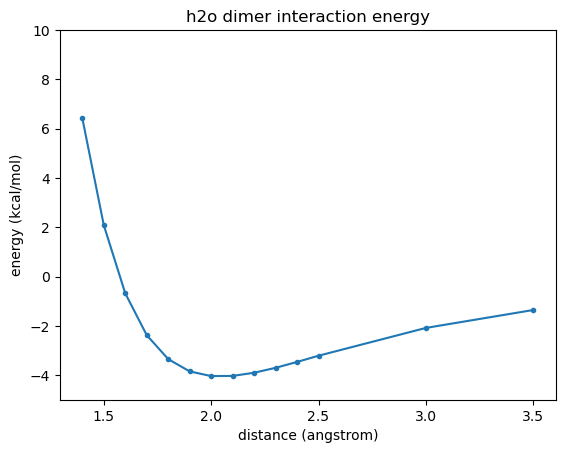

In [4]:
plt.plot(rvals,energies,".-"); # look at rvals and energies
# give it an xlabel
plt.xlabel("distance (angstrom)")

# give it a ylabel
plt.ylabel("energy (kcal/mol)")
plt.ylim(-5, 10)
# give it a title
plt.title("h2o dimer interaction energy")

plt.show()

## Scan 2D PES
Now let’s get even more detailed! Instead of simply scanning the PES along a single coordinate, let’s consider two coordinates at the same time. For this, we will choose to look at (1) the distance between the two molecules, and (2) a rotation of one of the molecules about the distance vector.

To do this, the first thing we need to do is redefine our z-matrix to define the angle we want to change. To maintain the water molecule as planar, we need to adjust two dihedral angles, such that one angle is always 180 from the other. We will define one of these dihedral angles as A and the other as B.

In [5]:
# Define water dimer
water_dimer2 = """
O1
H2 1 1.0
H3 1 1.0 2 104.52
x4 2 1.0 1 90.0 3 180.0
--
O5 2 **R** 4 90.0 1 180.0
H6 5 1.0 2 120.0 4 **A**
H7 5 1.0 2 120.0 4 **B**
"""

First, let’s choose one value of R and rotate through many dihedral angles. Since we want our water to remain planar, the two dihedral angles aren’t actually independent; they must always be 180 degrees apart. Therefore, we will choose a range of values for A, and then calculate B based on the value of A. We will create a list called `energies_R` to store our energy values for this particular value of R.

In [6]:
R = 1.8
Avals = np.linspace(start=-180,stop=180, num=25)

energies_R = []

for A in Avals:

    print(F'Computing dimer at {R:.1f} angstroms and {A:.2f} degrees')

    # Build a new molecule at each separation
    B = A-180
    molR = water_dimer2.replace('**R**', str(R))
    molA = molR.replace('**A**', str(A))
    molB = molA.replace('**B**', str(B))
    mol = psi4.geometry(molB)

    # calculate energy
    psi4.set_output_file(F'{molecule_name}_{R:.1f}_{A:.2f}_energy.dat', False)
    E = psi4.energy('scf/aug-cc-pVDZ', molecule=mol, bsse_type='cp')       
    E = E*627.509
    energies_R.append(E)

Computing dimer at 1.8 angstroms and -180.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and -165.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and -150.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and -135.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and -120.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and -105.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and -90.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and -75.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and -60.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and -45.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and -30.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and -15.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and 0.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and 15.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and 30.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and 45.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and 60.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and 75.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and 90.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and 105.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and 120.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and 135.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and 150.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and 165.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and 180.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


## Exercise
Plot the energy as a function of the dihedral angle A.

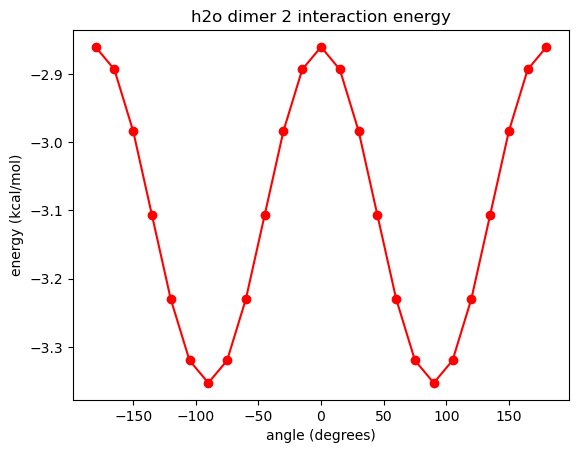

In [7]:
plt.figure()
plt.plot(Avals, energies_R, 'r-o') # look at Avals and energies_R
# give it xlabel and ylabel

# give it an xlabel
plt.xlabel("angle (degrees)")

# give it a ylabel
plt.ylabel("energy (kcal/mol)")

# give it a title
plt.title("h2o dimer 2 interaction energy")

plt.show()

Now let’s expand to two degrees of freedom. We will use the same angles as before, but now instead of just doing all the calculations at a single value of R, we will do the calculation at multiple values of R. To do this, we will use a nested *for loop*. This means we will have an outer `for` loop that counts over the different values of R and then an inner `for` loop that counts over the different values of A for a particular value of R. As we calculate the energies at each angle for a particular value of R, we will save the values in a list called `energies_R` as we did before. Once we have finished all the angles for a particular R, we will append the list `energies_R` to a list called `energy_2D`. This means `energy_2D` will be a list of lists. We will need to create `energy_2D` as an empty list outside of our `for` loop.

In [8]:
Rvals = np.linspace(start=1.8,stop=2.5,num=8)
Avals = np.linspace(start=-180,stop=180, num=25)

energy_2D = []

for R in Rvals:
    energies_R = []

    for A in Avals:

        print(F'Computing dimer at {R:.1f} angstroms and {A:.2f} degrees')

        # Build a new molecule at each separation
        B = A-180
        molR = water_dimer2.replace('**R**', str(R))
        molA = molR.replace('**A**', str(A))
        molB = molA.replace('**B**', str(B))
        mol = psi4.geometry(molB)

        # calculate energy
        psi4.set_output_file(F'{molecule_name}_{R:.1f}_{A:.2f}_energy.dat', False)
        E = psi4.energy('scf/aug-cc-pVDZ', molecule=mol, bsse_type='cp')       
        E = E*627.509
        energies_R.append(E)

    energy_2D.append(energies_R)

print(F'All calculations are complete!')

Computing dimer at 1.8 angstroms and -180.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and -165.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and -150.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and -135.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and -120.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and -105.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and -90.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and -75.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and -60.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and -45.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and -30.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and -15.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and 0.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and 15.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and 30.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and 45.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and 60.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and 75.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and 90.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and 105.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and 120.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and 135.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and 150.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and 165.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.8 angstroms and 180.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.9 angstroms and -180.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.9 angstroms and -165.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.9 angstroms and -150.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.9 angstroms and -135.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.9 angstroms and -120.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.9 angstroms and -105.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.9 angstroms and -90.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.9 angstroms and -75.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.9 angstroms and -60.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.9 angstroms and -45.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.9 angstroms and -30.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.9 angstroms and -15.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.9 angstroms and 0.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.9 angstroms and 15.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.9 angstroms and 30.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.9 angstroms and 45.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.9 angstroms and 60.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.9 angstroms and 75.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.9 angstroms and 90.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.9 angstroms and 105.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.9 angstroms and 120.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.9 angstroms and 135.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.9 angstroms and 150.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.9 angstroms and 165.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 1.9 angstroms and 180.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.0 angstroms and -180.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.0 angstroms and -165.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.0 angstroms and -150.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.0 angstroms and -135.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.0 angstroms and -120.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.0 angstroms and -105.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.0 angstroms and -90.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.0 angstroms and -75.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.0 angstroms and -60.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.0 angstroms and -45.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.0 angstroms and -30.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.0 angstroms and -15.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.0 angstroms and 0.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.0 angstroms and 15.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.0 angstroms and 30.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.0 angstroms and 45.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.0 angstroms and 60.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.0 angstroms and 75.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.0 angstroms and 90.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.0 angstroms and 105.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.0 angstroms and 120.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.0 angstroms and 135.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.0 angstroms and 150.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.0 angstroms and 165.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.0 angstroms and 180.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.1 angstroms and -180.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.1 angstroms and -165.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.1 angstroms and -150.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.1 angstroms and -135.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.1 angstroms and -120.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.1 angstroms and -105.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.1 angstroms and -90.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.1 angstroms and -75.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.1 angstroms and -60.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.1 angstroms and -45.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.1 angstroms and -30.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.1 angstroms and -15.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.1 angstroms and 0.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.1 angstroms and 15.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.1 angstroms and 30.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.1 angstroms and 45.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.1 angstroms and 60.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.1 angstroms and 75.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.1 angstroms and 90.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.1 angstroms and 105.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.1 angstroms and 120.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.1 angstroms and 135.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.1 angstroms and 150.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.1 angstroms and 165.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.1 angstroms and 180.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.2 angstroms and -180.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.2 angstroms and -165.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.2 angstroms and -150.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.2 angstroms and -135.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.2 angstroms and -120.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.2 angstroms and -105.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.2 angstroms and -90.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.2 angstroms and -75.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.2 angstroms and -60.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.2 angstroms and -45.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.2 angstroms and -30.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.2 angstroms and -15.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.2 angstroms and 0.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.2 angstroms and 15.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.2 angstroms and 30.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.2 angstroms and 45.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.2 angstroms and 60.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.2 angstroms and 75.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.2 angstroms and 90.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.2 angstroms and 105.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.2 angstroms and 120.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.2 angstroms and 135.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.2 angstroms and 150.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.2 angstroms and 165.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.2 angstroms and 180.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.3 angstroms and -180.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.3 angstroms and -165.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.3 angstroms and -150.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.3 angstroms and -135.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.3 angstroms and -120.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.3 angstroms and -105.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.3 angstroms and -90.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.3 angstroms and -75.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.3 angstroms and -60.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.3 angstroms and -45.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.3 angstroms and -30.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.3 angstroms and -15.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.3 angstroms and 0.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.3 angstroms and 15.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.3 angstroms and 30.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.3 angstroms and 45.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.3 angstroms and 60.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.3 angstroms and 75.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.3 angstroms and 90.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.3 angstroms and 105.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.3 angstroms and 120.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.3 angstroms and 135.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.3 angstroms and 150.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.3 angstroms and 165.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.3 angstroms and 180.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.4 angstroms and -180.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.4 angstroms and -165.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.4 angstroms and -150.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.4 angstroms and -135.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.4 angstroms and -120.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.4 angstroms and -105.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.4 angstroms and -90.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.4 angstroms and -75.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.4 angstroms and -60.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.4 angstroms and -45.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.4 angstroms and -30.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.4 angstroms and -15.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.4 angstroms and 0.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.4 angstroms and 15.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.4 angstroms and 30.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.4 angstroms and 45.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.4 angstroms and 60.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.4 angstroms and 75.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.4 angstroms and 90.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.4 angstroms and 105.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.4 angstroms and 120.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.4 angstroms and 135.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.4 angstroms and 150.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.4 angstroms and 165.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.4 angstroms and 180.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.5 angstroms and -180.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.5 angstroms and -165.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.5 angstroms and -150.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.5 angstroms and -135.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.5 angstroms and -120.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.5 angstroms and -105.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.5 angstroms and -90.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.5 angstroms and -75.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.5 angstroms and -60.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.5 angstroms and -45.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.5 angstroms and -30.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.5 angstroms and -15.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.5 angstroms and 0.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.5 angstroms and 15.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.5 angstroms and 30.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.5 angstroms and 45.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.5 angstroms and 60.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.5 angstroms and 75.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.5 angstroms and 90.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.5 angstroms and 105.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.5 angstroms and 120.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.5 angstroms and 135.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.5 angstroms and 150.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.5 angstroms and 165.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


Computing dimer at 2.5 angstroms and 180.00 degrees


/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(
/opt/anaconda3/envs/clean-env/envs/qm-tools/lib/python3.10/site-packages/psi4/driver/task_base.py:161: FutureWarning: Using the `local_options` keyword argument is deprecated in favor of using `task_config`, in version 0.30.0 it will stop working.
  self.result = qcng.compute(


All calculations are complete!


## Exercise
Plot the interaction energies as a function of angle for two different values of R, 2.0 and 2.3, on the same graph.

In the Rvals list, 2.0 angstrom is index 2, Rvals[2]. 2.3 angstroms is index 5, Rvals[5].

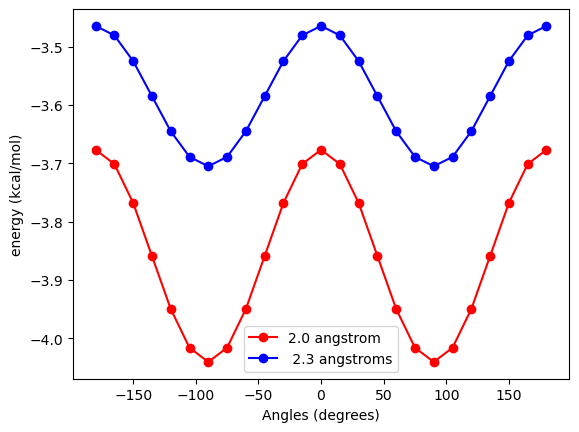

In [9]:
plt.figure()
plt.plot(Avals, energy_2D[2], 'r-o', label='2.0 angstrom')
plt.plot(Avals, energy_2D[5], 'b-o', label=' 2.3 angstroms')
# put in an x and ylabel

# give it an xlabel
plt.xlabel("Angles (degrees)")

# give it a ylabel
plt.ylabel("energy (kcal/mol)")
plt.legend()
plt.show()

## Making 3D plots
Comparing the two graphs you just made, it is clear that the interaction energy is a function of both the seperation between the molecules and the rotation angle. We can capture this in a 3D plot using some of matplotlib’s advanced features.

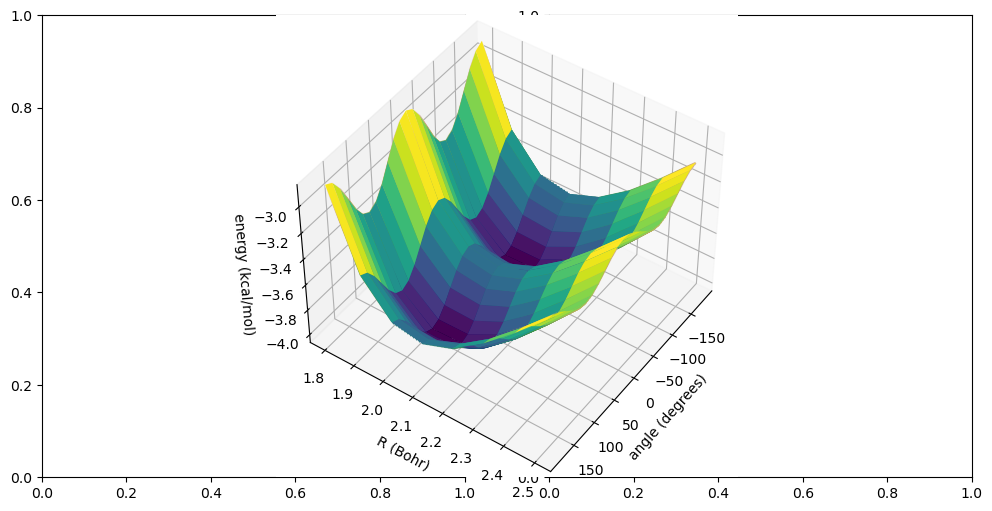

In [11]:
from mpl_toolkits import mplot3d
%matplotlib inline

X, Y = np.meshgrid(Avals, Rvals)

mycmap1 = plt.get_cmap('gist_earth')

fig, (ax,ax2) = plt.subplots(1,2,figsize=(12,6))

ax = plt.axes(projection='3d')
cf = ax.contour3D(X, Y, np.array(energy_2D), 300, cmap=mycmap1)
ax.plot_surface(X, Y, np.array(energy_2D), rstride=1, cstride=1, cmap='viridis', edgecolor='none')

ax.set_xlabel('angle (degrees)')
ax.set_ylabel('R (Bohr)')
ax.set_zlabel('energy (kcal/mol)')
#ax.set_zlim3d(-4,-2)
ax.view_init(45, 35)